In [2]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('max_columns', None)
df = pd.read_csv("CompleteDataset.csv", index_col=0)


footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

D:\DevelopersApplications\Python\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
footballers.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


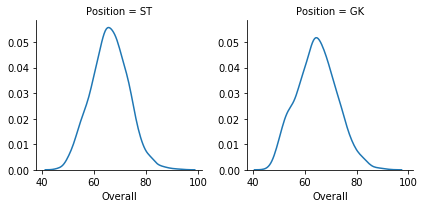

In [12]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
g = sns.FacetGrid(df, col="Position")
g.map(sns.kdeplot, "Overall")

In [14]:
df.describe()

,Age,Overall,Potential,Value,Special,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Value (M)
count,4306.000000,4306.000000,4306.000000,4306.000000,4306.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,4306.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,4306.000000
mean,25.399210,65.406642,70.521598,2.222714,1345.578960,61.388230,42.267896,45.041722,63.398331,55.496267,205726.795402,61.388230,45.028546,42.267896,55.496267,45.041722,63.398331,60.926219,64.679842,62.183136,47.061045,61.388230,45.028546,42.267896,55.496267,45.041722,63.398331,60.926219,64.679842,62.183136,47.061045,64.679842,2.222714
std,5.002131,7.426558,6.271490,5.793022,319.836393,7.473409,7.016945,7.323405,7.232752,7.678091,36335.550712,7.473409,6.732301,7.016945,7.678091,7.323405,7.232752,7.528785,7.047654,7.397829,7.002589,7.473409,6.732301,7.016945,7.678091,7.323405,7.232752,7.528785,7.047654,7.397829,7.002589,7.047654,5.793022
min,16.000000,46.000000,46.000000,0.000000,728.000000,29.000000,25.000000,26.000000,29.000000,30.000000,28.000000,29.000000,30.000000,25.000000,30.000000,26.000000,29.000000,30.000000,31.000000,29.000000,31.000000,29.000000,30.000000,25.000000,30.000000,26.000000,29.000000,30.000000,31.000000,29.000000,31.000000,31.000000,0.000000
25%,21.000000,60.000000,66.000000,0.220000,1073.000000,56.000000,37.000000,39.000000,58.000000,50.000000,190688.250000,56.000000,40.000000,37.000000,50.000000,39.000000,58.000000,55.000000,60.000000,57.000000,42.000000,56.000000,40.000000,37.000000,50.000000,39.000000,58.000000,55.000000,60.000000,57.000000,42.000000,60.000000,0.220000
50%,25.000000,65.000000,70.000000,0.550000,1332.500000,61.000000,42.000000,45.000000,63.000000,55.000000,213928.500000,61.000000,45.000000,42.000000,55.000000,45.000000,63.000000,61.000000,65.000000,62.000000,47.000000,61.000000,45.000000,42.000000,55.000000,45.000000,63.000000,61.000000,65.000000,62.000000,47.000000,65.000000,0.550000
75%,29.000000,70.000000,74.000000,1.600000,1623.000000,66.000000,47.000000,50.000000,68.000000,61.000000,232125.000000,66.000000,49.000000,47.000000,61.000000,50.000000,68.000000,66.000000,69.000000,67.000000,52.000000,66.000000,49.000000,47.000000,61.000000,50.000000,68.000000,66.000000,69.000000,67.000000,52.000000,69.000000,1.600000
max,47.000000,94.000000,94.000000,97.000000,2291.000000,89.000000,70.000000,74.000000,91.000000,82.000000,241207.000000,89.000000,72.000000,70.000000,82.000000,74.000000,91.000000,89.000000,92.000000,91.000000,73.000000,89.000000,72.000000,70.000000,82.000000,74.000000,91.000000,89.000000,92.000000,91.000000,73.000000,92.000000,97.000000


In [17]:
df["Position"].value_counts()

ST    2277
GK    2029
Name: Position, dtype: int64

In [18]:
df=footballers
df["Position"].value_counts()

CB     2705
ST     2277
GK     2029
CM     1977
CDM    1396
RM     1350
LM     1326
LB     1309
RB     1195
CAM    1125
RW      429
LW      427
CF      205
LWB     120
RWB     111
Name: Position, dtype: int64

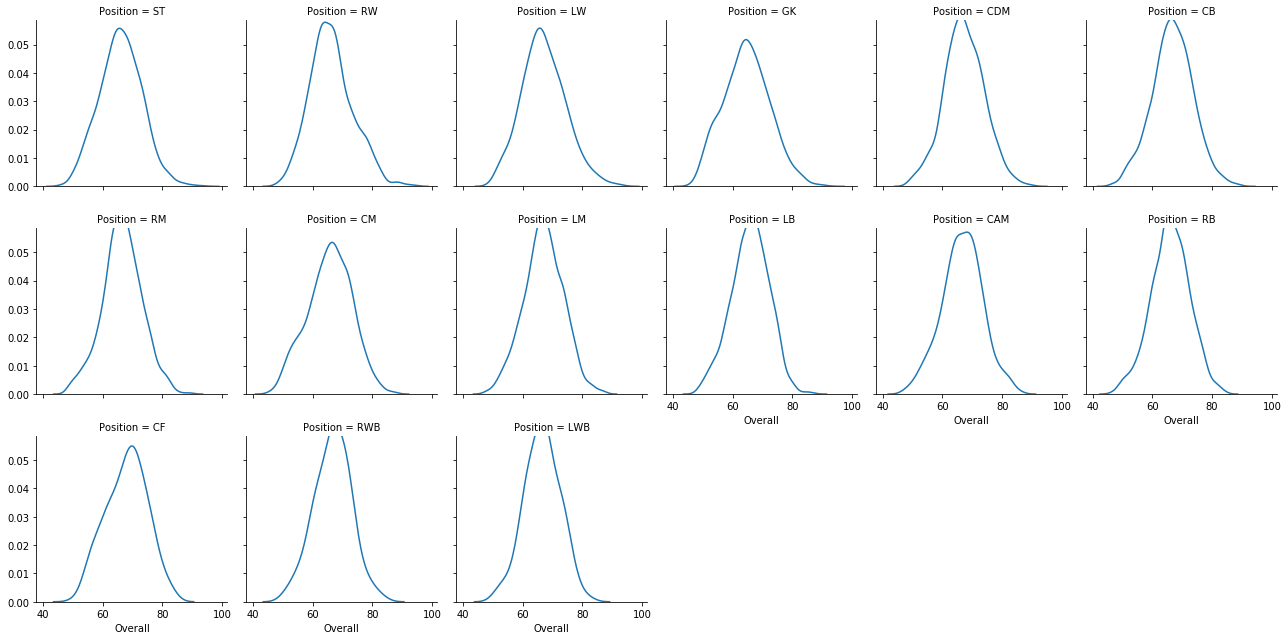

In [32]:
g = sns.FacetGrid(df, col="Position", col_wrap=6)
g.map(sns.kdeplot, "Overall")

In [37]:
df['Club']

0                Real Madrid CF
1                  FC Barcelona
2           Paris Saint-Germain
3                  FC Barcelona
4              FC Bayern Munich
5              FC Bayern Munich
6             Manchester United
7                       Chelsea
8                Real Madrid CF
9                      Juventus
10               Real Madrid CF
11              Manchester City
12                      Chelsea
13                      Arsenal
14               Real Madrid CF
15               Real Madrid CF
16              Manchester City
17                     Juventus
18                     Juventus
19                     Juventus
20              Atlético Madrid
21              Atlético Madrid
22             FC Bayern Munich
23            Borussia Dortmund
24                        Milan
25             FC Bayern Munich
26              Atlético Madrid
27             FC Bayern Munich
28                      Arsenal
29            Tottenham Hotspur
                  ...          
17951   

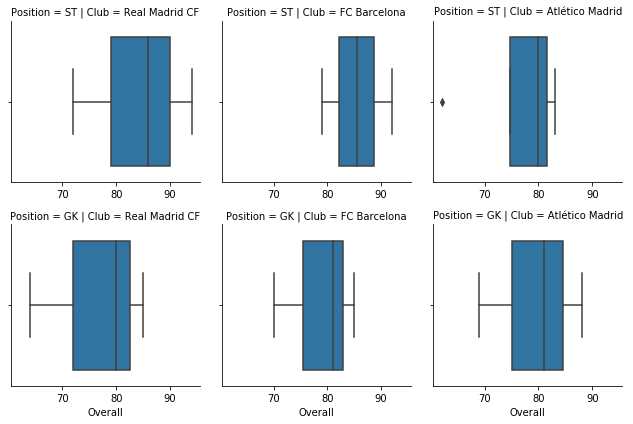

In [44]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]
g = sns.FacetGrid(df, row='Position', col="Club")
g.map(sns.boxplot, "Overall")

In [53]:
footballers[['Overall', 'Potential', 'Value']].head()

,Overall,Potential,Value
0,94,94,95.5
1,93,93,105.0
2,92,94,123.0
3,92,92,97.0
4,92,92,61.0


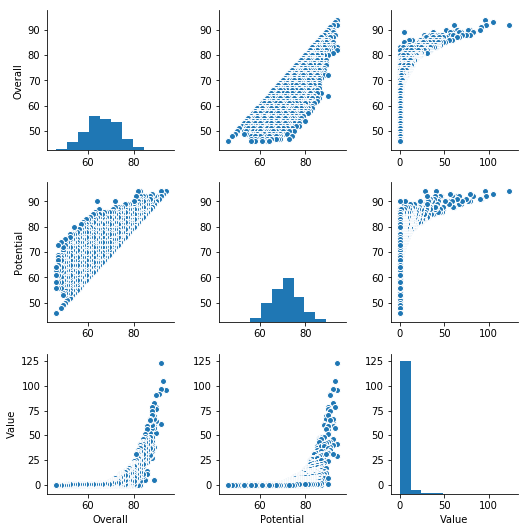

In [58]:
sns.pairplot(footballers[['Overall', 'Potential', 'Value']])

In [61]:
import pandas as pd
import seaborn as sns

pokemon = pd.read_csv("Pokemon (1).csv", index_col=0)
pokemon.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


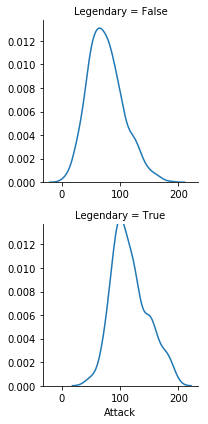

In [79]:
g = sns.FacetGrid(pokemon, row='Legendary')
g.map(sns.kdeplot, 'Attack')

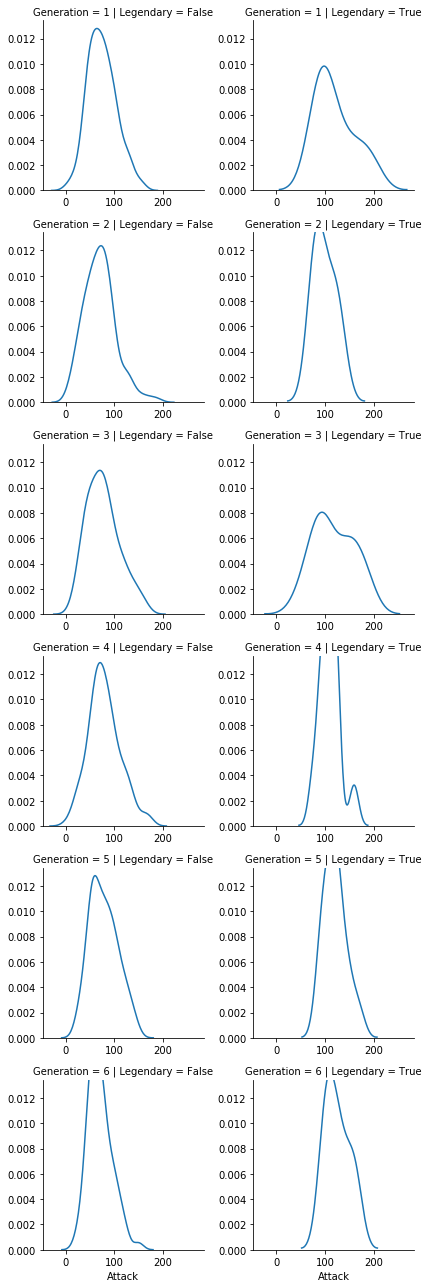

In [92]:
g = sns.FacetGrid(pokemon, row='Generation', col='Legendary')
g.map(sns.kdeplot, 'Attack')

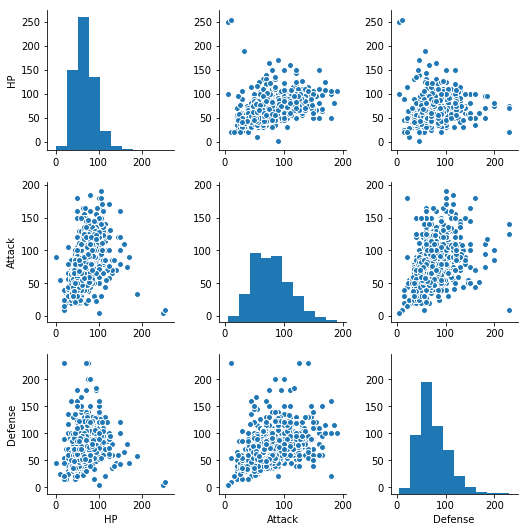

In [95]:
sns.pairplot(pokemon[['HP', 'Attack', 'Defense']])